In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.utils import to_categorical 
from sklearn.model_selection import train_test_split
import cv2
import os
from tqdm import tqdm

In [2]:
from tensorflow.keras.datasets.mnist import load_data

In [3]:
load_data?

Signature: load_data(path='mnist.npz')
Docstring:
Loads the [MNIST dataset](http://yann.lecun.com/exdb/mnist/).

This is a dataset of 60,000 28x28 grayscale images of the 10 digits,
along with a test set of 10,000 images.
More info can be found at the
[MNIST homepage](http://yann.lecun.com/exdb/mnist/).


Arguments:
    path: path where to cache the dataset locally
        (relative to `~/.keras/datasets`).

Returns:
    Tuple of Numpy arrays: `(x_train, y_train), (x_test, y_test)`.

    **x_train, x_test**: uint8 arrays of grayscale image data with shapes
      (num_samples, 28, 28).

    **y_train, y_test**: uint8 arrays of digit labels (integers in range 0-9)
      with shapes (num_samples,).

License:
    Yann LeCun and Corinna Cortes hold the copyright of MNIST dataset,
    which is a derivative work from original NIST datasets.
    MNIST dataset is made available under the terms of the
    [Creative Commons Attribution-Share Alike 3.0 license.](
    https://creativecommons.org/li

In [4]:
(x_train, y_train), (x_test, y_test)  = load_data()

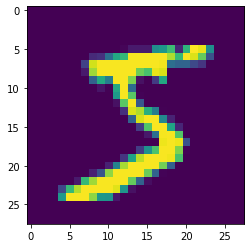

In [5]:
plt.imshow(x_train[0])

In [6]:
img = x_train[0]

In [7]:
img.shape

(28, 28)

In [8]:
import random

In [9]:
random.randint(0, 1)

1

In [10]:
size = 128

In [46]:
def create_img(num_images, spread=None):
    new_img = np.zeros([28, 128])
    shift = random.randint(0, size-28)
    num = random.randint(0, 9)
    idxs = np.where(y_train == num)
#     print(idxs[0].shape)
    idx = random.randint(0, len(idxs[0]))
    img = x_train[idx]
    new_img[:, shift: shift + 28] = img
    return new_img, (num, shift)

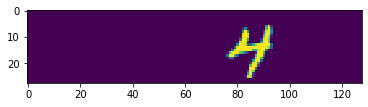

In [13]:
plt.imshow(create_img(1)[0])

In [54]:
imgs = []
nums = []
shifts = []
for _ in tqdm(range(50000)):
    img, (num, shift) = create_img(1)
    imgs.append(img.reshape(size, 28, 1))
    nums.append(num)
    shifts.append(shift)

100%|██████████████████████████████████████████████████████████████████████████| 50000/50000 [00:22<00:00, 2180.43it/s]


In [65]:
imgs = np.array(imgs).reshape(-1, 28, size, 1)
shifts = np.array(shifts).reshape(-1,1)
nums = np.array(nums).reshape(-1,1)

In [70]:
inp = Input([28,128,1])

x = Conv2D(4, kernel_size=(3,3), padding="same", activation="relu")(inp)
x = MaxPool2D()(x)

x = Conv2D(4, kernel_size=(3,3), padding="same", activation="relu")(x)
x = Flatten()(x)

x = Dense(128, activation="relu")(x)
clfs = Dense(10, activation="softmax", name="clfs")(x)
reg = Dense(1, activation="linear", name="reg")(x)

model = Model(inputs=inp, outputs=[clfs, reg])

In [68]:
def reg_loss()

In [76]:
cat_loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [77]:
model.compile(loss=[cat_loss(nums, clfs),
                   "MSE"],
             optimizer="adam",
             metrics=["accuracy", "mae"])

In [78]:
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 28, 128, 1)] 0                                            
__________________________________________________________________________________________________
conv2d_13 (Conv2D)              (None, 28, 128, 4)   40          input_9[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_6 (MaxPooling2D)  (None, 14, 64, 4)    0           conv2d_13[0][0]                  
__________________________________________________________________________________________________
conv2d_14 (Conv2D)              (None, 14, 64, 4)    148         max_pooling2d_6[0][0]            
____________________________________________________________________________________________

In [79]:
model.fit(imgs, (nums, shifts), epochs=3, verbose=0)

ValueError: in user code:

    c:\users\plajer\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\training.py:805 train_function  *
        return step_function(self, iterator)
    c:\users\plajer\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    c:\users\plajer\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    c:\users\plajer\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    c:\users\plajer\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    c:\users\plajer\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\training.py:788 run_step  **
        outputs = model.train_step(data)
    c:\users\plajer\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\training.py:756 train_step
        y, y_pred, sample_weight, regularization_losses=self.losses)
    c:\users\plajer\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:186 __call__
        self.build(y_pred)
    c:\users\plajer\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:139 build
        self._losses = nest.map_structure(self._get_loss_object, self._losses)
    c:\users\plajer\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\util\nest.py:659 map_structure
        structure[0], [func(*x) for x in entries],
    c:\users\plajer\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\util\nest.py:659 <listcomp>
        structure[0], [func(*x) for x in entries],
    c:\users\plajer\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:262 _get_loss_object
        loss = losses_mod.get(loss)
    c:\users\plajer\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\losses.py:1906 get
        'Could not interpret loss function identifier: {}'.format(identifier))

    ValueError: Could not interpret loss function identifier: KerasTensor(type_spec=TensorSpec(shape=(), dtype=tf.float32, name=None), name='Placeholder:0', description="created by layer 'tf.cast_2'")


In [37]:
imgs.shape

AttributeError: 'list' object has no attribute 'shape'

In [42]:
nums

array([[ 4],
       [ 2],
       [ 2],
       [ 9],
       [ 5],
       [ 9],
       [ 1],
       [10],
       [ 4],
       [ 0],
       [ 3],
       [ 1],
       [ 2],
       [ 6],
       [ 1],
       [ 6],
       [ 0],
       [ 7],
       [ 4],
       [ 7],
       [ 7],
       [ 6],
       [ 3],
       [ 7],
       [ 8],
       [ 6],
       [ 6],
       [10],
       [ 1],
       [ 0],
       [ 2],
       [ 9],
       [ 6],
       [ 7],
       [ 7],
       [10],
       [ 9],
       [ 7],
       [ 4],
       [ 4],
       [ 7],
       [ 3],
       [ 1],
       [10],
       [ 2],
       [ 8],
       [ 1],
       [ 6],
       [10],
       [ 1]])